NMFk example: Blind Source Separation
-----

A problem demonstrating how **NMFk** can be applied to extract unknown signals.

This type of analysis is frequently called **blind source separation** or **feature extraction**.

It can be easily perfored using NMFk.

If NMFk not installed, do `import Pkg; Pkg.add("NMFk"); Pkg.add("Mads");` first.

In [1]:
import NMFk

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2827320163206767679\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16089797421108046065\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2827320163206767679\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/vvv/.julia/packages/PyPlot/XHEG0/src/init.jl:118


Next, generate 3 random signals:

In [2]:
a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Array{Float64,2}:
 0.412829    0.741773  0.850224
 0.544169    0.913362  0.609823
 0.737141    0.570391  0.00288907
 0.00167403  0.637088  0.901134
 0.721271    0.631746  0.863482
 0.270131    0.83729   0.021867
 0.311331    0.89797   0.419748
 0.419085    0.942979  0.86895
 0.76113     0.949667  0.562127
 0.0673711   0.246544  0.755904
 0.237869    0.147631  0.464222
 0.556554    0.475253  0.356281
 0.88339     0.676314  0.951032
 0.0284085   0.349163  0.823823
 0.674606    0.423747  0.468931

The singals look like this:

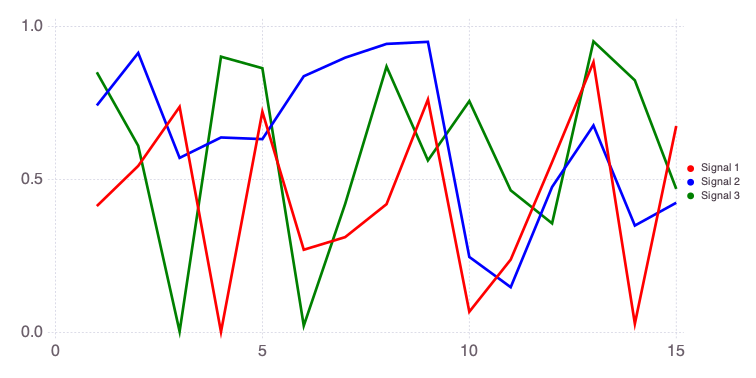

In [3]:
import Mads
Mads.plotseries([a b c])

Collect the signal vectors into a signal matrix `W`:

In [4]:
W = [a b c]

15×3 Array{Float64,2}:
 0.412829    0.741773  0.850224
 0.544169    0.913362  0.609823
 0.737141    0.570391  0.00288907
 0.00167403  0.637088  0.901134
 0.721271    0.631746  0.863482
 0.270131    0.83729   0.021867
 0.311331    0.89797   0.419748
 0.419085    0.942979  0.86895
 0.76113     0.949667  0.562127
 0.0673711   0.246544  0.755904
 0.237869    0.147631  0.464222
 0.556554    0.475253  0.356281
 0.88339     0.676314  0.951032
 0.0284085   0.349163  0.823823
 0.674606    0.423747  0.468931

Now we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors. 

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

In [5]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Array{Int64,2}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

Foe example, the first sensor (column 1 above) detects only Signals 1 and 3; Signal 2 is missing because `H[2,1]` is equal to zero.

The second sensor (column 2 above) detects Signals 1 and 2; Signal 3 is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

Foe example, the first sensor (column 1 above) detects Signal 3 times stronger than Signal 1.

The data matrix `X` is formed by multiplying `W` and `H` matrices:

In [6]:
X = W * H

15×5 Array{Float64,2}:
 2.9635    4.87006   0.741773  4.55909  6.14749
 2.37364   6.35505   0.913362  5.17664  5.42001
 0.745808  7.9418    0.570391  2.85484  1.89237
 2.70508   0.653829  0.637088  4.08658  5.78152
 3.31172   7.84446   0.631746  4.02221  6.30217
 0.335732  3.5386    0.83729   4.20832  2.05405
 1.57058   4.01128   0.89797   4.9096   4.20601
 3.02594   5.13383   0.942979  5.58384  6.64979
 2.44751   8.56096   0.949667  5.31046  5.4711
 2.33508   0.920255  0.246544  1.98863  4.33998
 1.63053   2.52632   0.147631  1.20238  2.85424
 1.6254    6.0408    0.475253  2.73255  3.28847
 3.73648   9.51021   0.676314  4.3326   6.99117
 2.49988   0.633247  0.349163  2.56964  4.84585
 2.0814    7.1698    0.423747  2.58766  3.86675

The data matrix `X` looks like this:

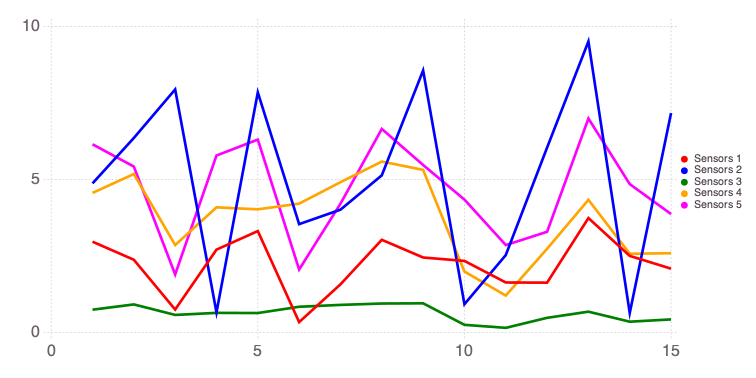

In [7]:
Mads.plotseries(X; name="Sensors")

Now, we can assume that we only know the data matrix `X` and assume that `W` and `H` matrices are unknown.

We can execute **NMFk** and analyze the data matrix `X`.

**NMFk** will automatically:

- identify the number of the unknown mixed signals in `X` 
- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at the 5 sensors (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

In [8]:
We, He, fitquality, robustness, aic, kopt = NMFk.execute(X, 2:5; save=false, method=:simple);


OF: min 17.390745733682895 max 17.40147782485225 mean 17.400063003707977 std 0.0034068755788919103
Worst correlation by columns: 0.8827253700809032
Worst correlation by rows: 0.03540524441737806
Worst norm by columns: 0.5578274714654153
Worst norm by rows: 0.7874941283736423
Signals:  2 Fit:     17.39075 Silhouette:    0.9915301 AIC:    -29.61624

OF: min 6.238127620047716e-6 max 0.22021100880804098 mean 0.06864753588142716 std 0.10302985833872454
Worst correlation by columns: 1.1683357435059067
Worst correlation by rows: 0.06702695777242186
Worst norm by columns: 0.4967808446848696
Worst norm by rows: 0.7639672134849015
Signals:  3 Fit: 6.238128e-06 Silhouette:    0.7394805 AIC:    -1102.674

OF: min 7.112398207878892e-11 max 0.0004050789036112689 mean 4.169239233668691e-5 std 0.00012770013601794827
Worst correlation by columns: 1.168379781849459
Worst correlation by rows: 0.06703772855696523
Worst norm by columns: 0.8147016630177183
Worst norm by rows: 0.7627248379528648
Signals:  4

**NMFk** returns the estimated optimal number of signals `kopt` which in this case, as expected, is equal to 3.

**NMFk** also returns estimates of matrices `W` and `H`.

Here the estimates of matrices W and H are stored as `We` and `He` objects.

`We[kopt]` and `He[kopt]` are scaled versions of the original `W` and `H` matrices:

In [9]:
We[kopt]

15×3 Array{Float64,2}:
 5.0839     8.82541    5.37261
 6.11497    6.72641    7.39732
 2.00857    2.04314    9.9535
 5.98113    7.88296    7.11831e-8
 2.62389   10.3164     9.172
 6.68141    0.018553   4.27402
 7.04853    3.98395    4.56297
 6.95865    8.73392    5.64382
 5.46314    7.04794   10.2286
 1.98914    7.29685    0.5445
 0.282626   5.24964    2.82883
 1.92304    4.94316    7.29626
 2.29646   11.7368    11.2135
 3.13647    7.65801    0.103294
 0.888013   6.58092    8.66043

In [10]:
He[kopt]

3×5 Array{Float64,2}:
 0.047987    0.0308431  0.102264    0.529762  0.289143
 0.306835    0.0595435  0.00323678  0.116471  0.513914
 0.00219874  0.779462   0.035987    0.155971  0.0263807

Note that the order of columns ('signals') in `W` and `We[kopt]` are not expected to match.

Also note that the order of rows ('sensors') in `H` and `He[kopt]` are also not expected to match.

The estimated order of 'signals' will be different every time the code is executed.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


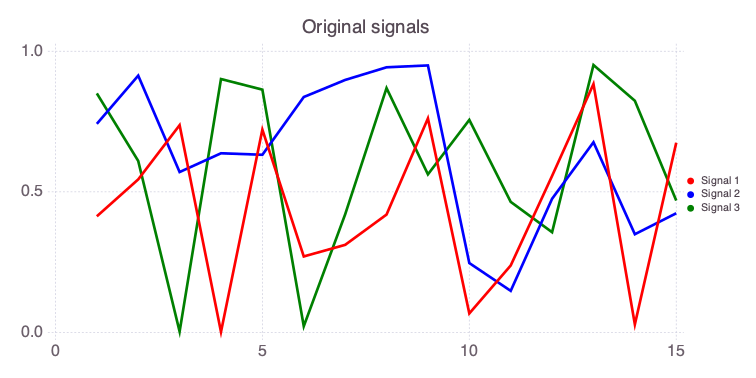

In [11]:
Mads.plotseries(W; title="Original signals")

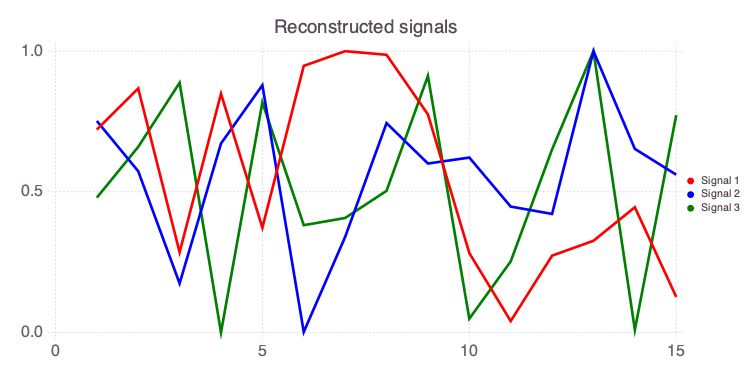

In [12]:
Mads.plotseries(We[kopt] ./ maximum(We[kopt]; dims=1); title="Reconstructed signals")

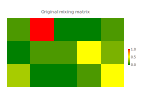

In [13]:
NMFk.plotmatrix(H ./ maximum(H); title="Original mixing matrix")

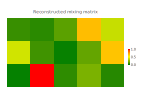

In [14]:
NMFk.plotmatrix(He[kopt] ./ maximum(He[kopt]); title="Reconstructed mixing matrix")